<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Machine-learning-in-Football/blob/main/Dribble_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import json
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDClassifier,LogisticRegression,SGDRegressor,LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.utils import shuffle
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [ ]:
data=pd.read_pickle("https://github.com/Dinesh-Adhithya-H/sports-analytics/blob/master/dribble_dataset.pkl?raw=true")
data=shuffle(data)

In [ ]:
data

,location,dribble_outcome
3796,"[70.4, 23.9]",Incomplete
3281,"[44.3, 5.1]",Complete
2856,"[38.0, 16.0]",Incomplete
3662,"[105.0, 7.0]",Incomplete
3343,"[57.1, 18.7]",Incomplete
...,...,...
3496,"[69.2, 20.3]",Complete
2882,"[79.7, 70.5]",Complete
2968,"[37.9, 2.9]",Incomplete
2433,"[119.0, 60.0]",Incomplete


Text(0.5, 1.0, 'Dribble data histogram')

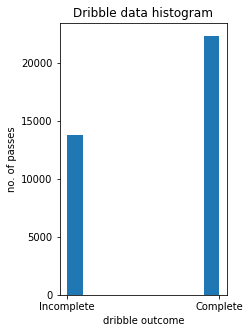

In [ ]:
plt.figure(figsize=(3,5))
plt.hist(data["dribble_outcome"])
plt.xlabel("dribble outcome")
plt.ylabel("no. of passes")
plt.title("Dribble data histogram")

In [ ]:
len(data[data["dribble_outcome"]=="Complete"]),len(data[data["dribble_outcome"]=="Incomplete"])

(22326, 13786)

In [ ]:
d=data[data["dribble_outcome"]=="Complete"]
d=d.append(data[data["dribble_outcome"]=="Incomplete"])

(array([22326.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 13786.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

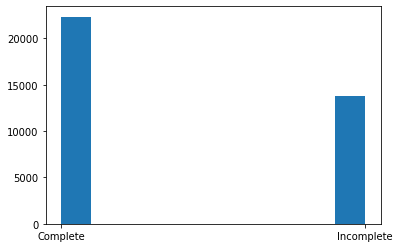

In [ ]:
plt.hist(d["dribble_outcome"])

In [ ]:
X=np.array(data["location"])

In [ ]:
x=[]
for i in X:
  x.append(np.array(i))
x=np.array(x)

In [ ]:
x[0]

array([70.4, 23.9])

In [ ]:
x.shape,y.shape

((36112, 2), (36112,))

In [ ]:
y_label=np.array(data["dribble_outcome"])

In [ ]:
y=[]
for i in y_label:
  if i=="Complete":
    y.append(1.0)
  else:
    y.append(0.0)
y=np.array(y)

In [ ]:
xx=MinMaxScaler().fit(x)
x=xx.transform(x)

In [ ]:
x,y=shuffle(x,y)

In [ ]:
x

array([[0.38377926, 0.19326683],
       [0.05936455, 0.62219451],
       [0.65301003, 0.89276808],
       ...,
       [0.96237458, 0.30922693],
       [0.26170569, 0.02493766],
       [0.49498328, 0.27057357]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

0.46615024186493365


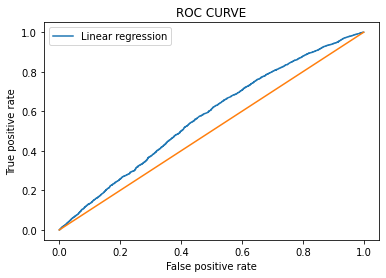

In [ ]:
lr=LinearRegression().fit(x_train,y_train)
print(np.mean(np.abs(lr.predict(x_test)-y_test)))
y_train_pred = lr.predict(x_test)
x,y,z=roc_curve(y_test,y_train_pred)
plt.plot(x,y,label="Linear regression")
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC CURVE")
plt.legend()
plt.show()

In [ ]:
roc_auc_score(y_test,y_train_pred)

0.5715082786757693

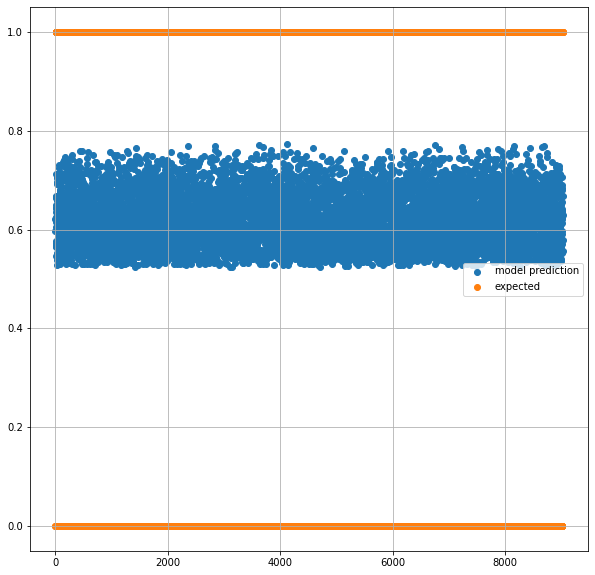

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(np.arange(len(y_train_pred)),y_train_pred,label="model prediction")
plt.scatter(np.arange(len(y_train_pred)),y_test,label="expected")
plt.legend()
plt.grid()
plt.show()

[08:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.4533808397894208


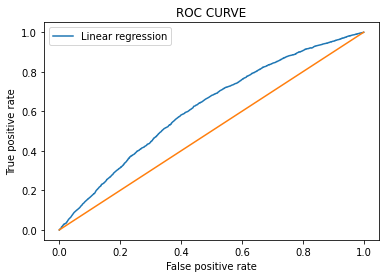

In [ ]:
lr=xgboost.XGBRegressor().fit(x_train,y_train)
print(np.mean(np.abs(lr.predict(x_test)-y_test)))
y_train_pred = lr.predict(x_test)
x,y,z=roc_curve(y_test,y_train_pred)
plt.plot(x,y,label="Linear regression")
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC CURVE")
plt.legend()
plt.show()

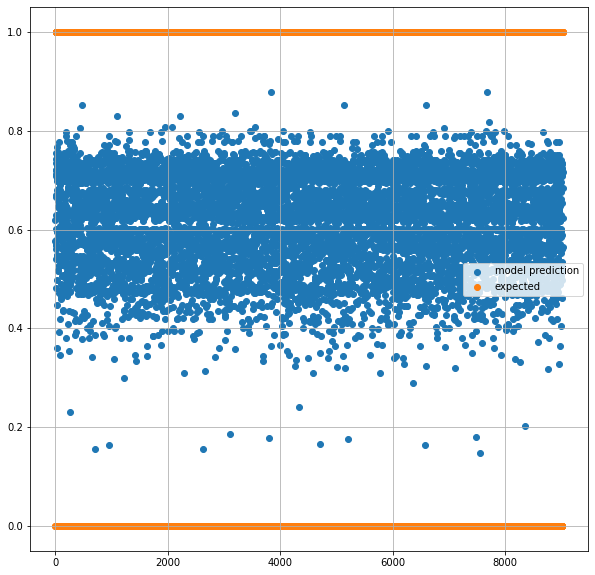

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(np.arange(len(y_train_pred)),y_train_pred,label="model prediction")
plt.scatter(np.arange(len(y_train_pred)),y_test,label="expected")
plt.legend()
plt.grid()
plt.show()

In [ ]:
confusion_marix=np.array([[0,0],[0,0]])
for i in range(len(y_test)):
  if y_train_pred[i]<=0.5:
    if y_train[i]==0.0:
      confusion_marix[0][0]+=1
    else:
      confusion_marix[0][1]+=1
  else:
    if y_train[i]==0.0:
      confusion_marix[1][0]+=1
    else:
      confusion_marix[1][1]+=1

In [ ]:
np.mean(np.abs(y_train_pred-y_test))

0.4533808397894208

In [ ]:
confusion_marix

array([[ 470,  741],
       [2959, 4858]])

In [ ]:
import tensorflow as tf
from tensorflow import keras
model=tf.keras.models.Sequential([
  tf.keras.layers.Dense(1028,input_shape=x_train[0].shape),
  keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(1208,activation="relu"),
  keras.layers.Dropout(0.8),
  keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(1208,activation="relu"),
  keras.layers.Dropout(0.3),
  keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(2,activation="softmax")
])
model.compile(optimizer=keras.optimizers.Adam(lr=0.0005, decay=5e-7),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1028)              3084      
_________________________________________________________________
batch_normalization (BatchNo (None, 1028)              4112      
_________________________________________________________________
dense_1 (Dense)              (None, 1208)              1243032   
_________________________________________________________________
dropout (Dropout)            (None, 1208)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1208)              4832      
_________________________________________________________________
dense_2 (Dense)              (None, 1208)              1460472   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1208)              0

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
847/847 [==============================] - 31s 35ms/step - loss: 0.9537 - accuracy: 0.5504 - val_loss: 0.6649 - val_accuracy: 0.6114
Epoch 2/10
847/847 [==============================] - 29s 34ms/step - loss: 0.6837 - accuracy: 0.5980 - val_loss: 0.6725 - val_accuracy: 0.6053
Epoch 3/10
847/847 [==============================] - 29s 34ms/step - loss: 0.6793 - accuracy: 0.5955 - val_loss: 0.7100 - val_accuracy: 0.5932
Epoch 4/10
847/847 [==============================] - 29s 34ms/step - loss: 0.6797 - accuracy: 0.5961 - val_loss: 0.6719 - val_accuracy: 0.6134
Epoch 5/10
847/847 [==============================] - 29s 35ms/step - loss: 0.6799 - accuracy: 0.5926 - val_loss: 0.6564 - val_accuracy: 0.6174
Epoch 6/10
847/847 [==============================] - 29s 34ms/step - loss: 0.6814 - accuracy: 0.5943 - val_loss: 0.6666 - val_accuracy: 0.6056
Epoch 7/10
847/847 [==============================] - 29s 34ms/step - loss: 0.6735 - accuracy: 0.6028 - val_loss: 0.7196 - val_accuracy:

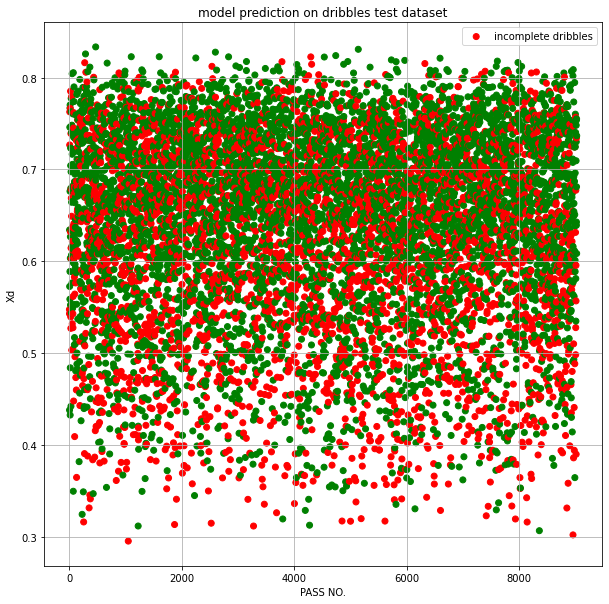

In [ ]:
y_train_pred = model.predict(x_test)
plt.figure(figsize=(10,10))
plt.title("model prediction on dribbles test dataset")
color = ['green' if y_test[x]>0.5 else 'red' for x in range(len(y_train_pred))]
plt.scatter(np.arange(len(y_train_pred)),y_train_pred[:,1],label="incomplete dribbles",c=color)
#plt.scatter(np.arange(len(y_train_pred)),y_test,label="expected")
plt.xlabel("PASS NO.")
plt.ylabel("Xd")
plt.legend()
plt.grid()
plt.show()

In [ ]:
np.mean(y_train_pred)

0.5

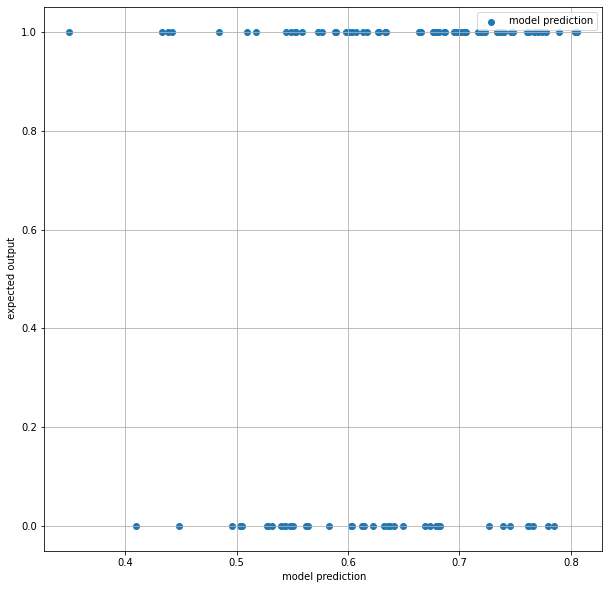

In [ ]:
plt.figure(figsize=(10,10))
x_test1=x_test[:100]
y_train_pred=model.predict(x_test1)
y_train_pred=y_train_pred[:,1]
plt.scatter(y_train_pred,y_test[:100],label="model prediction")
#plt.scatter(np.arange(len(y_train_pred)),y_test,label="expected")
plt.legend()
plt.ylabel(" expected output")
plt.xlabel(" model prediction")
plt.grid()
plt.show()

In [ ]:
model.save("dribble_deep_learning.h5")

In [ ]:
loc_x=[]
loc_y=[]
for i in X:
  loc_x.append(i[0])
  loc_y.append(i[1])
loc_x=np.array(loc_x)
loc_y=np.array(loc_y)

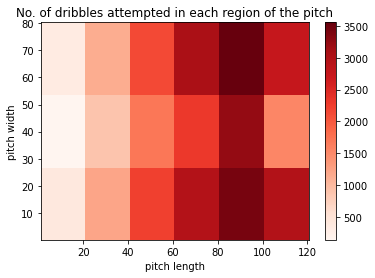

In [ ]:
plt.xlabel("pitch length")
plt.ylabel("pitch width")
plt.title("No. of dribbles attempted in each region of the pitch")
a=plt.hist2d(loc_x,loc_y,bins=(6,3),cmap=plt.cm.Reds)
#plt.xlim((110,120))
#plt.ylim((20,60))
plt.colorbar()
plt.show()

In [ ]:
cd=np.array(data[data["dribble_outcome"]=="Complete"])

In [ ]:
cd

array([[list([44.3, 5.1]), 'Complete'],
       [list([38.6, 19.5]), 'Complete'],
       [list([55.3, 66.9]), 'Complete'],
       ...,
       [list([69.2, 20.3]), 'Complete'],
       [list([79.7, 70.5]), 'Complete'],
       [list([97.4, 65.3]), 'Complete']], dtype=object)

In [ ]:
cloc_x=[]
cloc_y=[]
for i in cd:
  cloc_x.append(i[0][0])
  cloc_y.append(i[0][1])
cloc_x=np.array(cloc_x)
cloc_y=np.array(cloc_y)

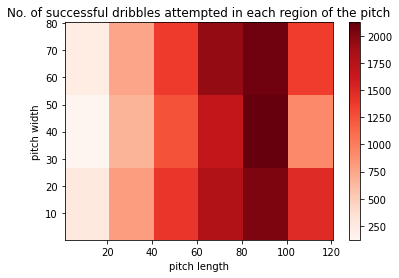

In [ ]:
plt.xlabel("pitch length")
plt.ylabel("pitch width")
plt.title("No. of successful dribbles attempted in each region of the pitch")
b=plt.hist2d(cloc_x,cloc_y,bins=(6,3),cmap=plt.cm.Reds)
#plt.xlim((110,120))
#plt.ylim((20,60))
plt.colorbar()
plt.show()

In [ ]:
a

(array([[ 403.,  144.,  350.],
        [1229.,  891., 1151.],
        [2224., 1715., 2145.],
        [2962., 2313., 3052.],
        [3448., 3237., 3555.],
        [2981., 1546., 2766.]]),
 array([  1.        ,  20.93333333,  40.86666667,  60.8       ,
         80.73333333, 100.66666667, 120.6       ]),
 array([ 0.1       , 26.83333333, 53.56666667, 80.3       ]),
 <matplotlib.collections.QuadMesh at 0x7f1a420f5ad0>)

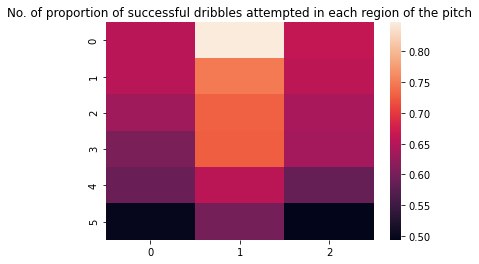

In [ ]:
plt.title("No. of proportion of successful dribbles attempted in each region of the pitch")
sns.heatmap(b[0]/a[0])